 # importing libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

# loading the dataset

In [89]:
#creating database connection
conn = sqlite3.connect('inventory.db')

#fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,145080,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


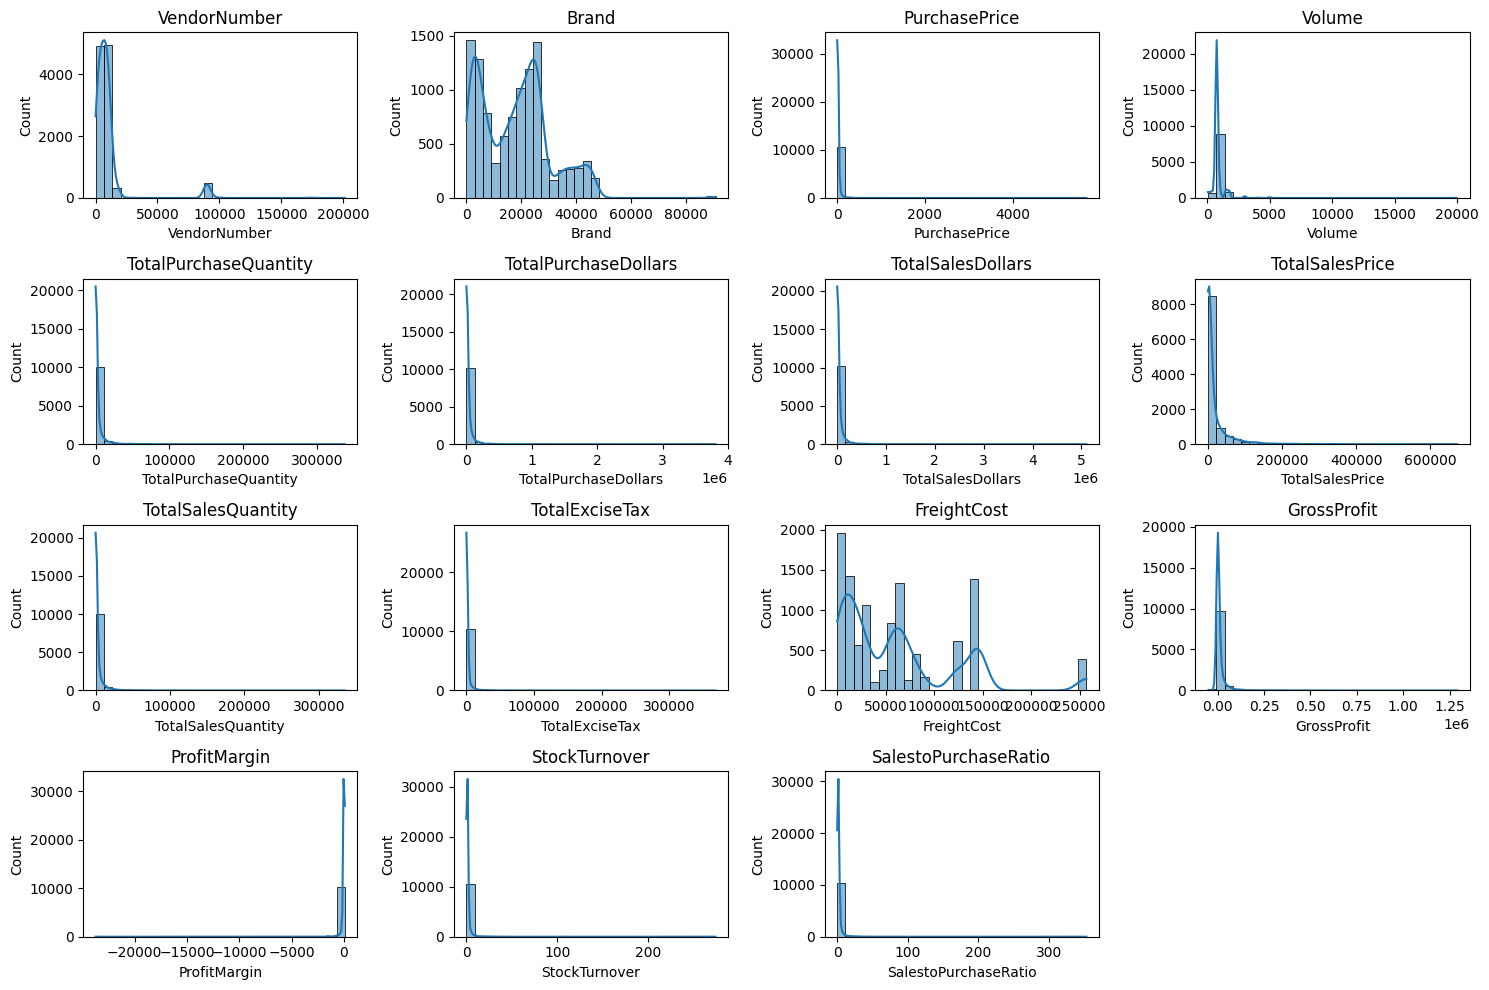

In [90]:
# distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns  

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)  
    sns.histplot(df[col], kde=True, bins=30) 
    plt.title(col)

plt.tight_layout()
plt.show()

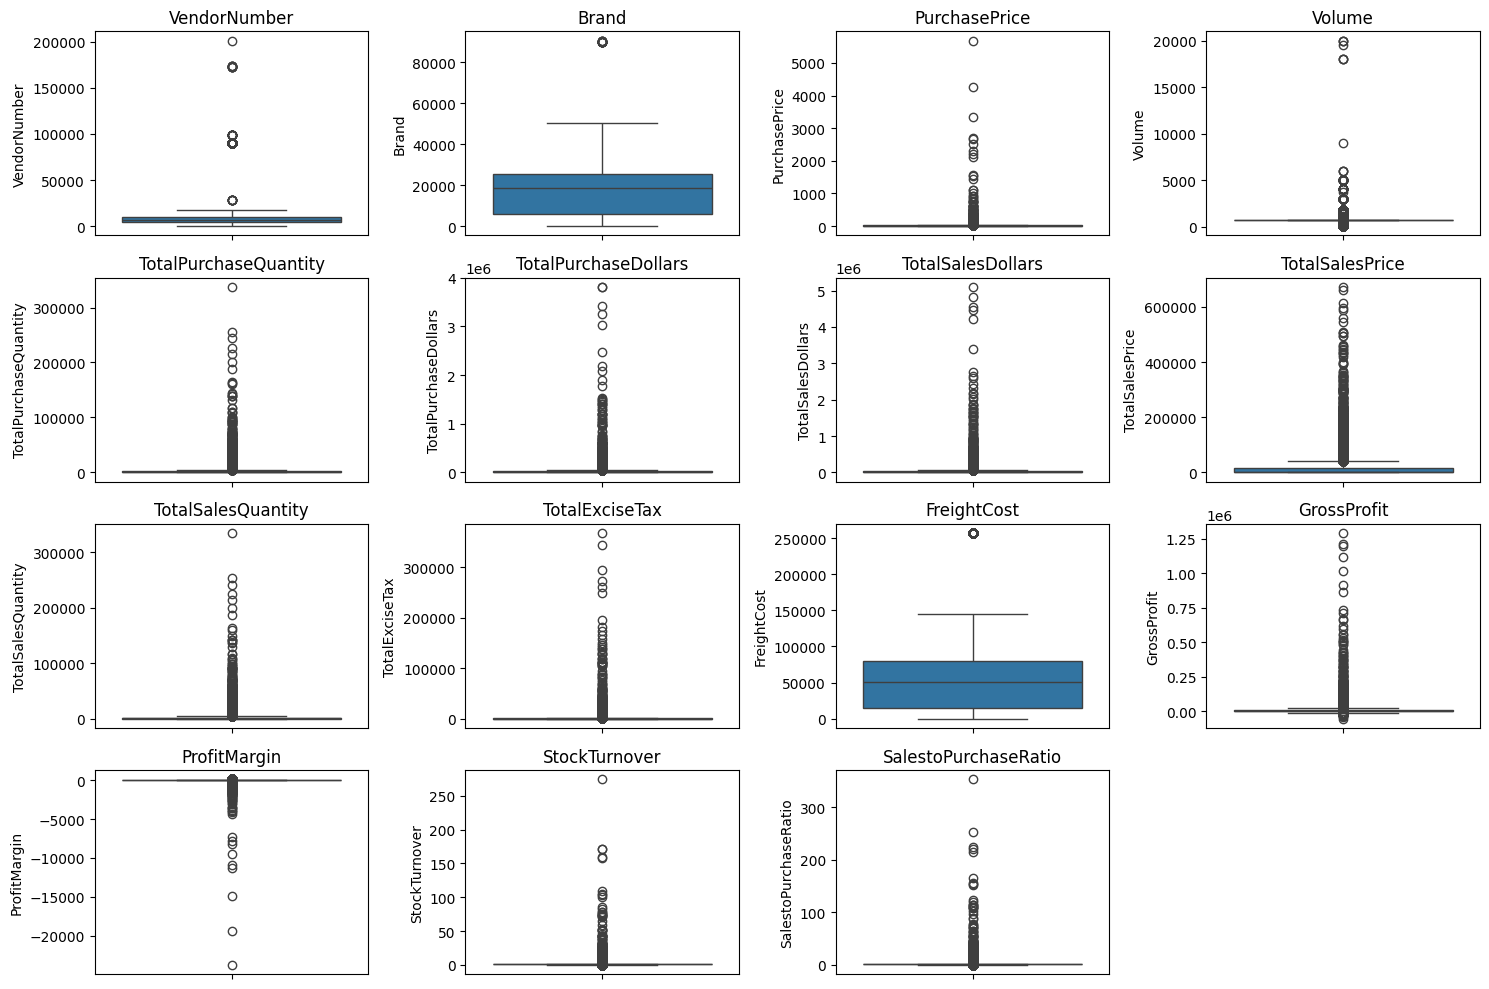

In [91]:
# outlier detection with boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)  
    sns.boxplot(y=df[col]) 
    plt.title(col)

plt.tight_layout()
plt.show()

# summary statistics insights:
_negative & zero values:_
 
. gross profit: miimum vaalue is -52,002,78, indicating losses. some products or yransactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price..

. profit margin: has a minimum of -∞ , which suggest cases where revenue is zero or even lower than costs.

. total sales quantity & sales dollars: minimun values arre 0, meaning some products were purchsed but never sold . these could be slow-moving or obsolete strock.

 _Outlies indicated by High Standard Deviation:_
  
. Purchase & Actual Price: the max values(5,681,81 & 7,499,99) are significantly higher than the mean (24.39 & 35.64) indicating potential premium products.

. feight cost: huge variation,from 0.09 to 257,032,07, suggest logistics inefficiencies or bulk shipments.

. stock turnovere: ranges from 0 to 274.5,implying some products sell extremely fast while other remain in stock indefinitely. value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to ether sales are being fulfilled from older stock
    

In [92]:
# let's filter the data by removing inconsistencis
df= pd.read_sql_query("""SELECT *
FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0 
AND TotalSalesQuantity > 0""", conn)

In [93]:
df



,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,145080,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,750.0,2,2.64,15.95,10.96,5.0,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,50.0,6,2.34,65.66,1.47,134.0,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,50.0,2,1.48,1.98,0.99,2.0,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,200.0,1,1.47,143.28,77.61,72.0,15.12,257032.07,141.81,98.974037,72.000000,97.469388


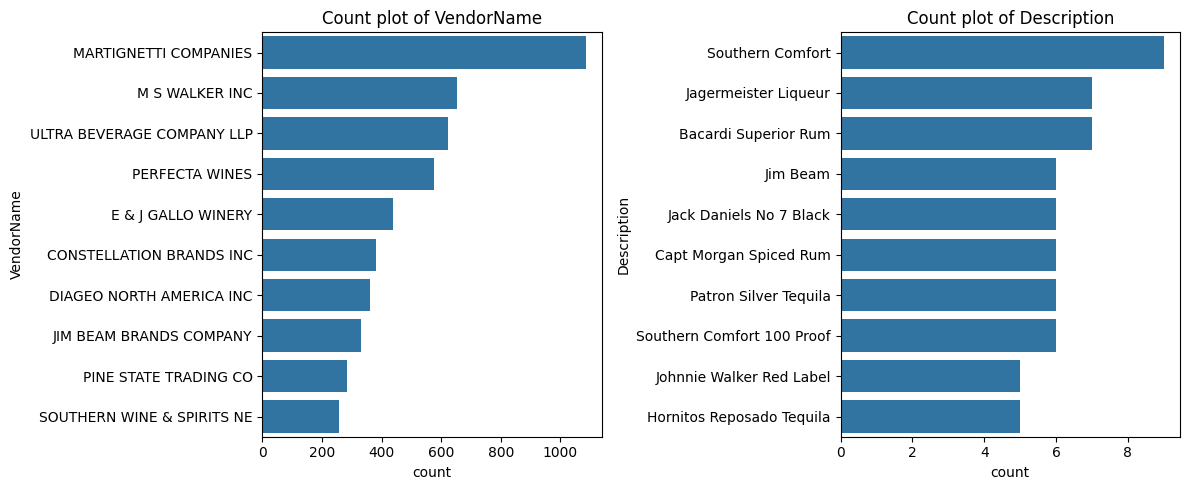

In [94]:
# count plates for categorical columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):  # fixed enumerate9 -> enumerate
    plt.subplot(1, 2, i + 1)
    sns.countplot(
        y=df[col],
        order=df[col].value_counts().index[:10]  # fixed order+ -> order=
    )
    plt.title(f"Count plot of {col}")

plt.tight_layout()
plt.show()

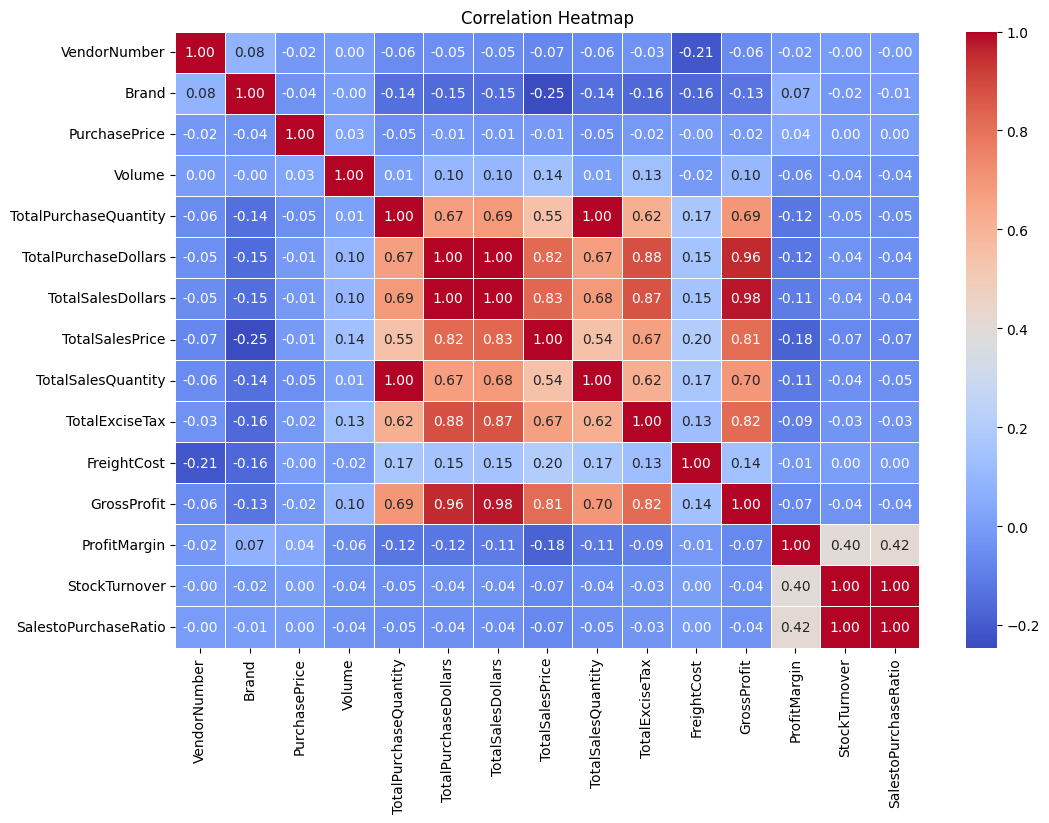

In [95]:
#correlation heatmap
plt.figure(figsize=(12, 8))

correlation_matrix = df[numerical_cols].corr()  # fixed 'martix' -> 'matrix' and 'numerical_col' -> 'numerical_cols'

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",  # fixed 'cnap' -> 'cmap'
    linewidths=0.5
)

plt.title("Correlation Heatmap")
plt.show()

 # correlation insights
. purchaseprice has weak correlation with totalsalesdollars(-0.012) and grossprofit(-0.016), suggesting that price variations do not significantly impact sales revenue pr profit
    
. strong correlation between total purchase quantity and total saes quantity (0.999),confirming efficient inventory turnover.
    
    . negative correlation betwwen profit margin & total sales price (-0.179) suggests that as sales price increases margins decrease possibly due to competitive pricing pressures.
    
    . strockturnover has weak negative correlation with both grossprofit(-0.038) and profitmargin(-0.055) ,indicating that faster turnover does not necessarily result in highere profitability.

# data analysis

identify brands that needs promotional or pricing adjustments which exhibit lower sales performance but higher profit margins

In [96]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin': 'mean'
}).reset_index()

In [97]:
low_sales_threshold = brand_performance['TotalSalesDollars']. quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [98]:
low_sales_threshold

np.float64(560.299)

In [99]:
high_margin_threshold

np.float64(64.97017552750113)

In [100]:
# filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
     (brand_performance['ProfitMargin'] >= high_margin_threshold)
    ]
print("Brands with low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [101]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 10000]

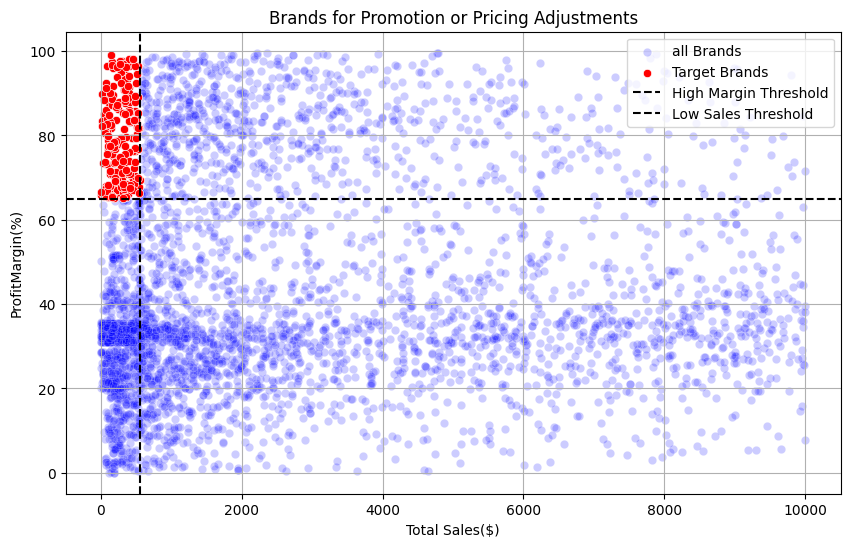

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y= 'ProfitMargin', color= "blue", label = "all Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y= 'ProfitMargin', color= "red", label = "Target Brands")

plt.axhline(high_margin_threshold, linestyle='--',color='black',label ="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--',color='black',label ="Low Sales Threshold") 

plt.xlabel("Total Sales($)")
plt.ylabel("ProfitMargin(%)")
plt.title("Brands for Promotion or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()


which vendors and brands demonstrate the highest sales performance?

In [103]:
def format_dollars (value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"  
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"     
    else:
        return str(value)

In [104]:
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [105]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [106]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

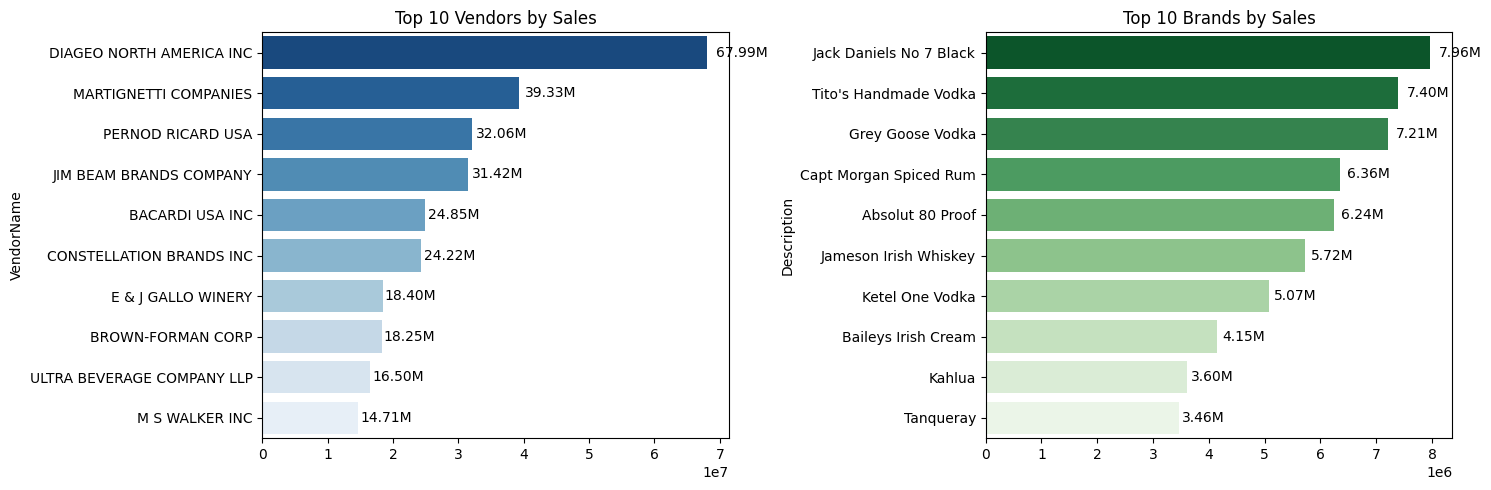

In [107]:
plt.figure(figsize=(15, 5))

# --- Top Vendors ---
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

# Add labels to bars
for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

# --- Top Brands ---
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index, x=top_brands.values, palette="Greens_r")
plt.title("Top 10 Brands by Sales")

# Add labels to bars
for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()

# which vendors contribute the most to total purchase dollars?


In [108]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()
    

In [137]:
vendor_performance['PurchaseContribution%'] = (
    vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum() 
) * 100

In [138]:
round(vendor_performance.sort_values('PurchaseContribution%', ascending = False),2)


,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.30
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,8.30
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.76
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.64
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.67
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.00
107,UNCORKED,118.74,58.20,176.94,0.00
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.00


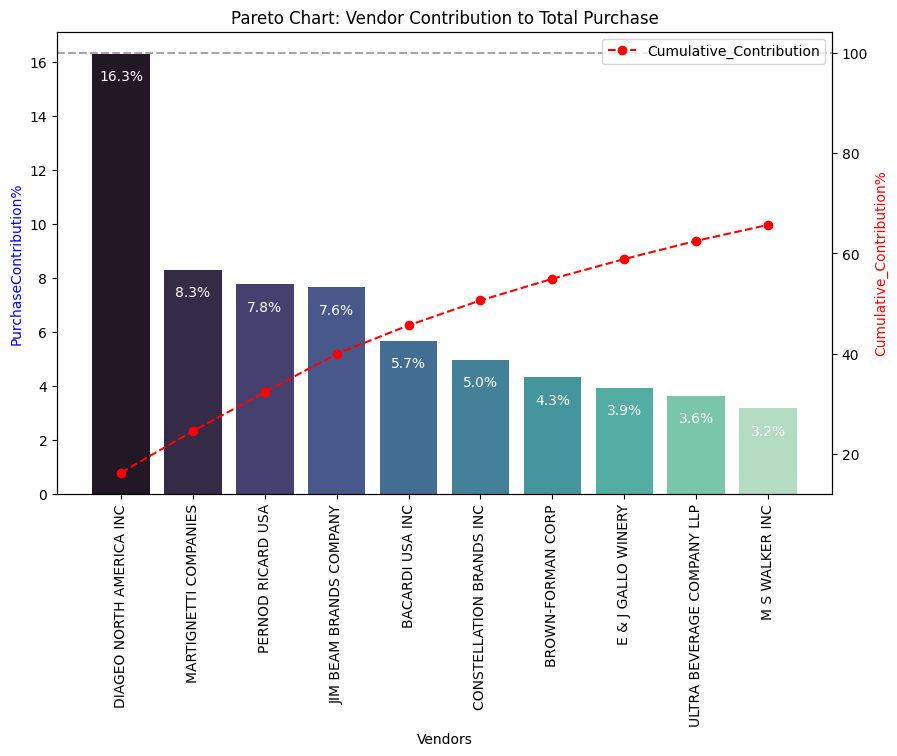

In [155]:
# 1. Sort by contribution
top_vendors = vendor_performance.sort_values(
    'PurchaseContribution%', ascending=False
).head(10).copy()

# 2. Calculate cumulative percentage
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()

# 3. Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(
    x='VendorName',
    y='PurchaseContribution%',
    data=top_vendors,
    palette="mako",
    ax=ax1
)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, f"{value:.1f}%", ha='center', fontsize=10, color='white')

ax2 = ax1.twinx()
ax2.plot(
    top_vendors['VendorName'],
    top_vendors['Cumulative_Contribution%'],
    color='red',
    marker='o',
    linestyle='dashed',
    label='Cumulative_Contribution'
)

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('PurchaseContribution%', color='blue')
ax2.set_ylabel('Cumulative_Contribution%', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchase')
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()


# Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost saving?

In [114]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']


In [115]:
df["OrderSize"] = pd.qcut(
    df['TotalPurchaseQuantity'],
    q=3,
    labels=["Small", "Medium", "Large"]
)

In [116]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


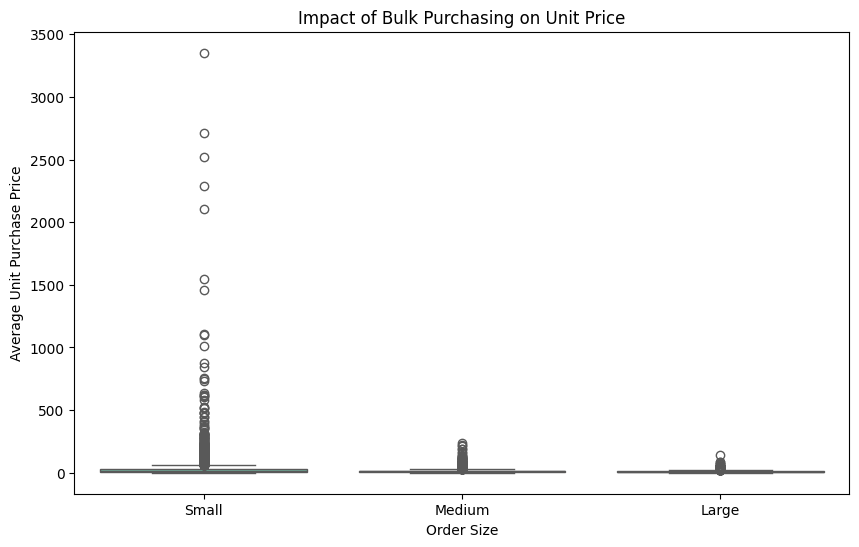

In [117]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

. Vendors buying in bulk (Large Order Size) get the lowest until price($10.78 per unit), meaning higher margin if they can manage inventory efficiently.
    
. The price difference between Small and Lrge orders is substantial(-72% reduction in unit cost)
    
. this suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

# which vendors have low inventory turnover , indicating excess stock and slow- moving products?

In [118]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending = True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


# how much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [119]:
df["UnsoldInventoryValue"] =(df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print ('Total Unsold Capital:', format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital: 2.71M


In [120]:
inventory_value_per_vendor = df. groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

inventory_value_per_vendor = inventory_value_per_vendor. sort_values(by="UnsoldInventoryValue", ascending = False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


# what is the 95% confidence intervals for profit margins of top - performaing and low- performaing vendors.

In [121]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [122]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= top_threshold]["ProfitMargin"].dropna()

In [123]:
low_vendors

1622     0.568840
1646     2.513325
1786    12.479372
1803    14.366830
1812    12.428142
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 6423, dtype: float64

In [124]:
def confidence_interval(data, confidence =0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) /np.sqrt(len(data))
    t_critical = stats.t.ppf(( 1 + confidence) / 2, df= len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

top Vendors 95% CI: (30.742064, 31.613761), mean: 31.177912
low Vendors 95% CI: (40.665094, 41.810930), mean: 41.238012


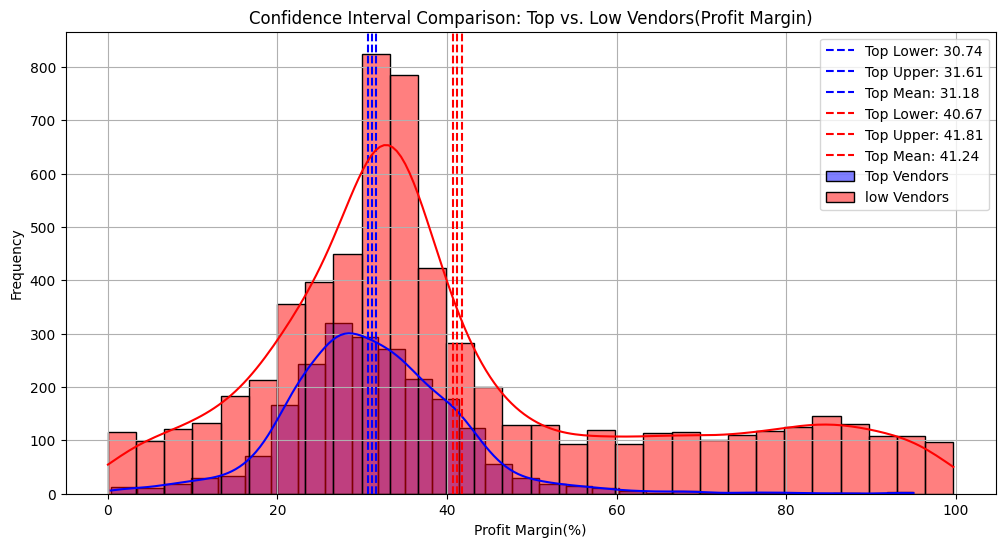

In [125]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"top Vendors 95% CI: ({top_lower:2f},{top_upper: 2f}), mean: {top_mean:2f}")
print(f"low Vendors 95% CI: ({low_lower:2f},{low_upper: 2f}), mean: {low_mean:2f}")

plt.figure(figsize=(12,6))

sns.histplot(top_vendors, kde=True, color ='blue' , bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color ="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color ="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color ="blue", linestyle="--", label=f"Top Mean: {top_mean:.2f}")

sns.histplot(low_vendors, kde=True, color ='red' , bins=30, alpha=0.5, label="low Vendors")
plt.axvline(low_lower, color ="red", linestyle="--", label=f"Top Lower: {low_lower:.2f}")
plt.axvline(low_upper, color ="red", linestyle="--", label=f"Top Upper: {low_upper:.2f}")
plt.axvline(low_mean, color ="red", linestyle="--", label=f"Top Mean: {low_mean:.2f}")


plt.title("Confidence Interval Comparison: Top vs. Low Vendors(Profit Margin)")
plt.xlabel("Profit Margin(%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()




. the confidece intervel for low-performing vendors(40,48% to 41.23%) is significanty higher than that of top- performing vendors (30.74% to 31.61%).

. this suggests that vendors with lower sales tend to matain higher profit margins , potentially due to premium pricing or lower operational costs.

.for high-performing vendors.if they aim to improve profitability,they could explore selective price adjustment , cost adjustment ,cost optimization or bundling strategies.

.for low-low-performing vendors: despite highmargins, their low sales volume might indicate a need for better marketing, competitive, or improved distribution strategies

In [156]:
df = pd.read_sql_query("select * from vendor_sales_summary", conn)
df.to_csv("vendor_performance.csv", index=False)
